In [22]:
import requests
import json
import pandas as pd
import io
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
def ask_gemini(prompt):
    url = "https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent"
    params = {
        "key": open('apikey.txt').read()
    }
    data = {
        "contents": [{
            "parts": [{
                "text": prompt
            }]
        }]
    }
    return requests.post(url,params=params,data=json.dumps(data)).json()["candidates"][0]["content"]["parts"][0]["text"]



In [9]:
res = ask_gemini("Give me the top industry in each of the 50 US states in one word only.  Output results as a CSV")

In [10]:
res.replace("\\\n","\n")
df = pd.read_csv(io.StringIO(res))
df.columns = ["State","Industry"]

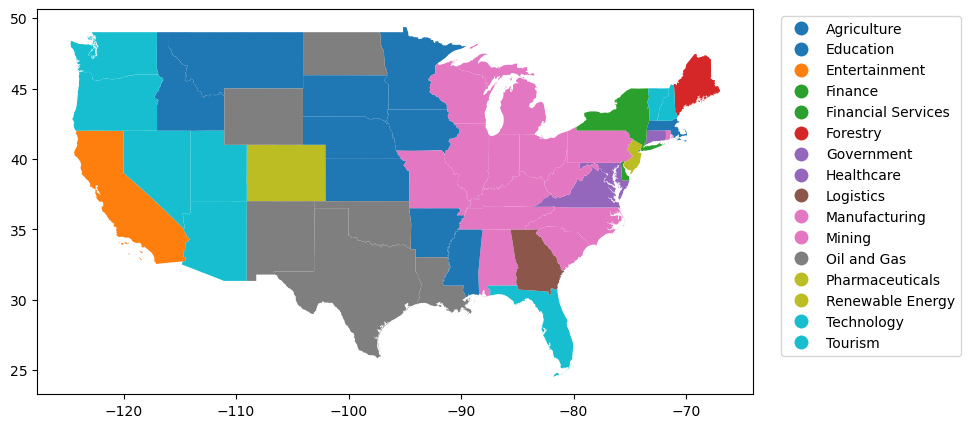

In [32]:
# now let's merge with geopandas and draw
gdf = gpd.read_file("data/cb_2018_us_state_500k")
contig = gdf.merge(df,how="right",left_on="NAME",right_on="State")
contig = contig[~contig.STUSPS.isin(["HI","AK"])]
fig, ax = plt.subplots(figsize=(10,5))
contig.plot(column="Industry",ax=ax,legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3, 0.,0., 1.0))